# 公式修改最终版

### 数据预处理

In [2]:
import pandas as pd 
data = pd.read_excel(r'D:/修改公式/宿州市住宅类可比实例入库版20180529.xlsx')
data = data[4300:]
DEGREE = 2
def process(data):
    data['ratio'] = data['所在楼层']/data['总楼层']
    pivot_price = {} # 基准价格
    # 计算小区均价
    for name,group in data.groupby('小区名称'):
        pivot_price[name] = group['单价'].mean()
    data['pivot'] = data['小区名称'].apply(lambda x:pivot_price[x])
    data['ratio_price'] = data['单价']/data['pivot']
    data = data[data['ratio_price'] <= 1.25] # 去除异常值
    return data
data = process(data)
data.to_excel("D:/修改公式/宿州小区——带平均价格.xlsx",index=False)

### 公式训练函数

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

def train(rg,method,data):
    df = data[(data['总楼层'] >= rg[0]) & (data['总楼层'] <= rg[1])]
    def pipeline(x,y):
        # 将x转化为2次
        pf = PolynomialFeatures(degree=DEGREE)
        x = x.reshape(-1,1)
        x = pf.fit_transform(x)
        # 建立模型
        clf = RidgeCV(alphas=[1e-4,1e-5,1e-3,1e-2,1e-1,1e0])
        clf.fit(x,y)
        yp = 0.99*clf.predict(x)
        # 计算误差
        loss = np.abs(yp-y)/y
        print("模型误差为：%.6f" % np.mean(loss))
        # 绘制散点图
        plt.figure(figsize=(10,5))
        plt.scatter(x[:,1],y)
        plt.scatter(x[:,1],yp)
        # 输出参数
        # print("公式为y = %.6f * x^3 + %.6f * x^2 + %.6f * x + %.6f" % (0.99*clf.coef_[3],0.99*clf.coef_[2],0.99*clf.coef_[1],0.99*clf.intercept_))
        print("公式为y = %.6f * x^2 + %.6f * x + %.6f" % (0.99*clf.coef_[2],0.99*clf.coef_[1],0.99*clf.intercept_))
        
    if method == 'middle':
        df = df[(df['所在楼层']!=1)&(df['所在楼层']!=df['总楼层'])]
        x = df['ratio']
        y = df['ratio_price']
        pipeline(x,y)
    elif method == 'bottom':
        df = df[df['所在楼层'] == 1]
        x = df['总楼层']
        y = df['ratio_price']
        pipeline(x,y)
    elif method == "top":
        df = df[df['所在楼层'] == df['总楼层']]
        x = df['总楼层']
        y = df['ratio_price']
        pipeline(x,y)

### 中高层：8-18公式

#### 一楼

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':


模型误差为：0.035877
公式为y = 0.000025 * x^2 + -0.000867 * x + 1.081667


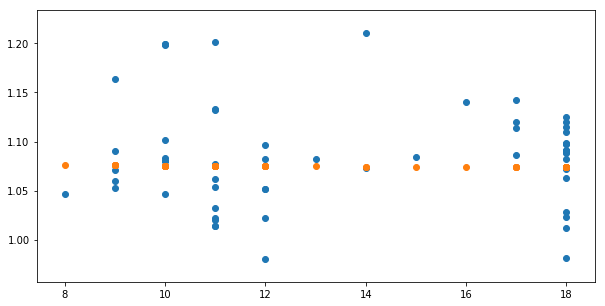

In [3]:
train([8,18],method='bottom',data=data)

#### 中层

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':


模型误差为：0.012091
公式为y = -0.116519 * x^2 + 0.154851 * x + 0.945365


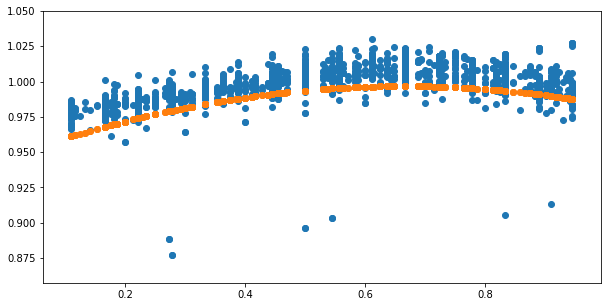

In [4]:
train([8,18],method='middle',data=data)

#### 顶层

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':


模型误差为：0.016475
公式为y = 0.000395 * x^2 + -0.011357 * x + 1.032168


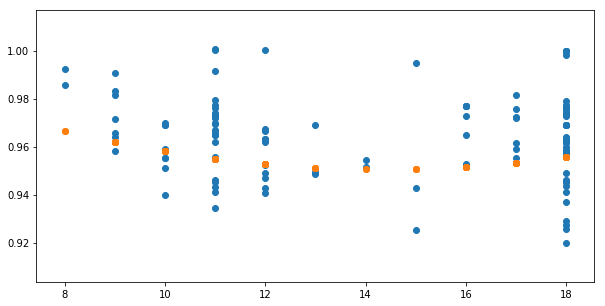

In [5]:
train([8,18],method='top',data=data)

### 高层：19-33公式

#### 一层

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':


模型误差为：0.047736
公式为y = -0.000115 * x^2 + 0.002901 * x + 1.086532


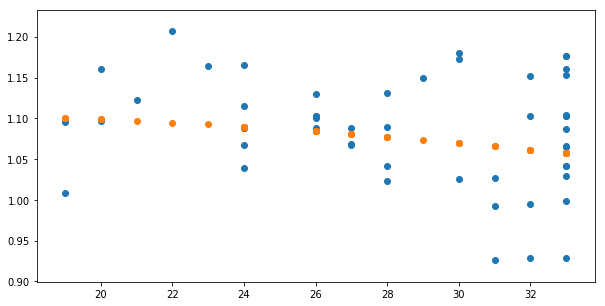

In [6]:
train([19,33],method='bottom',data=data)

#### 中层

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':


模型误差为：0.011351
公式为y = -0.189868 * x^2 + 0.233236 * x + 0.932497


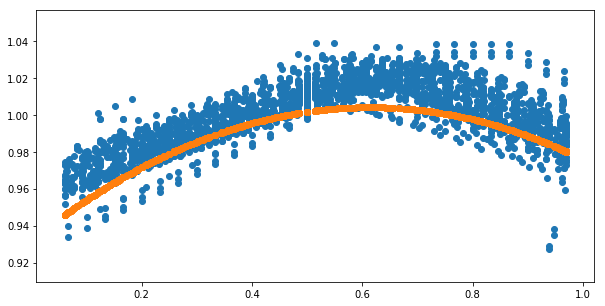

In [7]:
train([19,33],method='middle',data=data)

#### 顶层

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':


模型误差为：0.018622
公式为y = -0.000119 * x^2 + 0.007608 * x + 0.828935


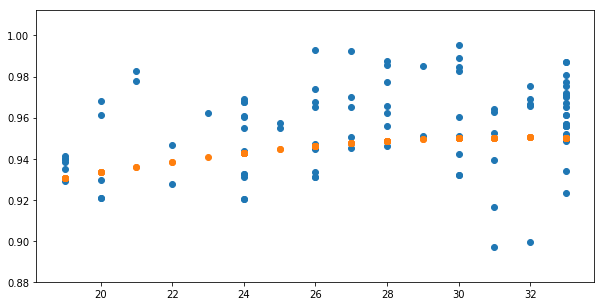

In [8]:
train([19,33],method='top',data=data)

### 超高层：34-45公式

#### 一层

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:928: RuntimeWarning: invalid value encountered in true_divide
  return (c / G_diag) ** 2, c


模型误差为：0.010000
公式为y = 0.000000 * x^2 + 0.000000 * x + 0.986353


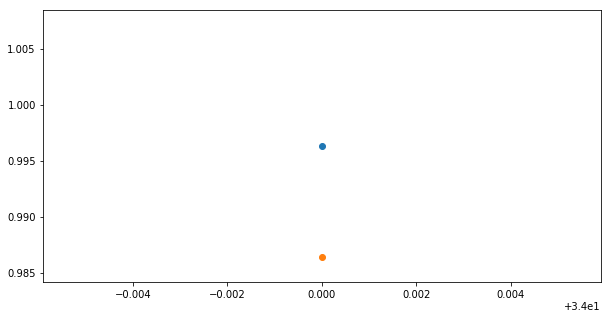

In [9]:
train([34,45],method='bottom',data=data)

模型误差为：0.010133
公式为y = -0.213801 * x^2 + 0.255238 * x + 0.932392


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':


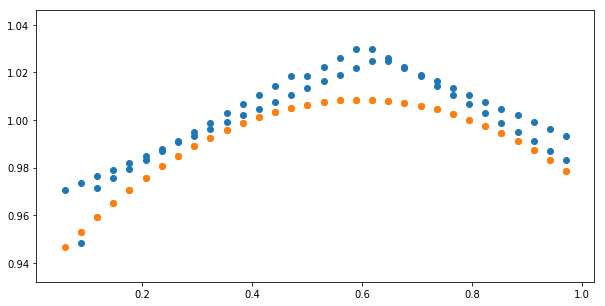

In [10]:
train([34,45],method='middle',data=data)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':


模型误差为：0.009988
公式为y = 0.000000 * x^2 + 0.000000 * x + 0.926746


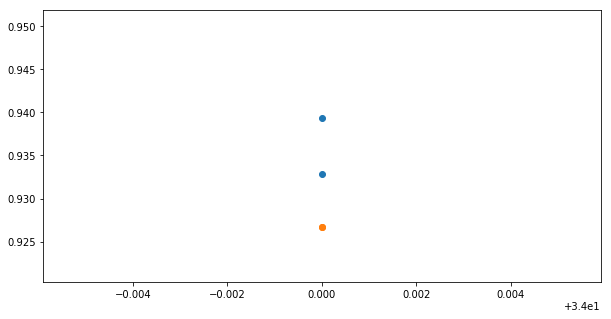

In [11]:
train([34,45],method='top',data=data)